Importamos librerías

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Cargamos los Datasets para hacer el respectivo Estudio

In [2]:
df1 = pd.read_csv("./Datasets/Internet_Penetracion.csv")
df2 = pd.read_csv("./Datasets/Internet_tecnologia_localidad.csv")
df3 = pd.read_csv("./Datasets/Internet_velocidad_bajada.csv")
df4 = pd.read_csv("./Datasets/historico_velocidad_internet.csv")

Comprobamos los csv esten cargados correctamente

In [4]:
df1

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"
...,...,...,...,...
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"


Ahora avanzamos con la exploración de los datos del primer dataframe "df1"

In [18]:
# Obtener información sobre el DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [19]:
# Obtener estadísticas básicas del DataFrame
df1.describe()

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [20]:
# Contar el número de valores nulos en cada columna
df1.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [21]:
# Contar el número de valores únicos en cada columna
df1.nunique()

Año                               9
Trimestre                         4
Provincia                        24
Accesos por cada 100 hogares    779
dtype: int64

In [23]:
# Obtener una lista de provincias únicas en el DataFrame
df1['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [24]:
# Obtener una lista de años únicos en el DataFrame
df1['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [26]:
# Obtener una lista de trimestres únicos en el DataFrame
df1['Trimestre'].unique()

array([3, 2, 1, 4], dtype=int64)

Comenzamos con la visualización de graficos para la detección de patrones y valores atípicos

In [6]:
# Convertir la columna 'Accesos por cada 100 hogares' a tipo numérico
df1['Accesos por cada 100 hogares'] = pd.to_numeric(df1['Accesos por cada 100 hogares'].str.replace(',', '.'))

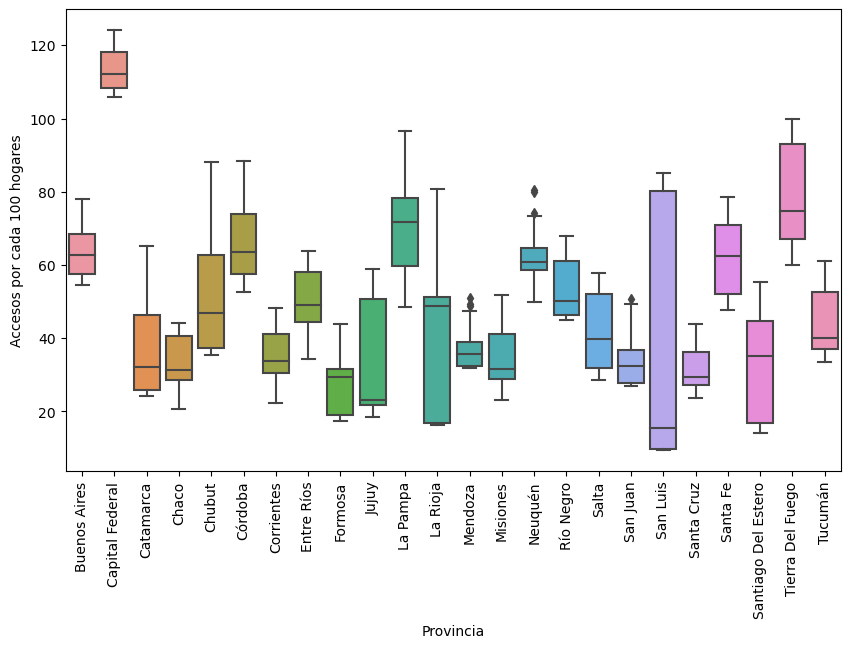

In [7]:
# Visualizar el diagrama de caja Para encontrar valores Atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df1)
plt.xticks(rotation=90)
plt.show()

In [ ]:
"""
Podemos obsevar algunos valores atipicos en Mendoza, Neuquén y san juan donde los accesos por cada 100 hogares son significativamente más altos 
que en el resto de las provincias. También podemos observar que la mayoría de las provincias tienen una mediana similar en cuanto al acceso a Internet, 
mientras que la Ciudad de Buenos Aires tiene la mediana más alta de todas las provincias. 
Este análisis nos permite identificar patrones y anomalías en los datos que pueden ser útiles para tomar decisiones y mejorar la penetración de Internet en diferentes regiones del país.
"""

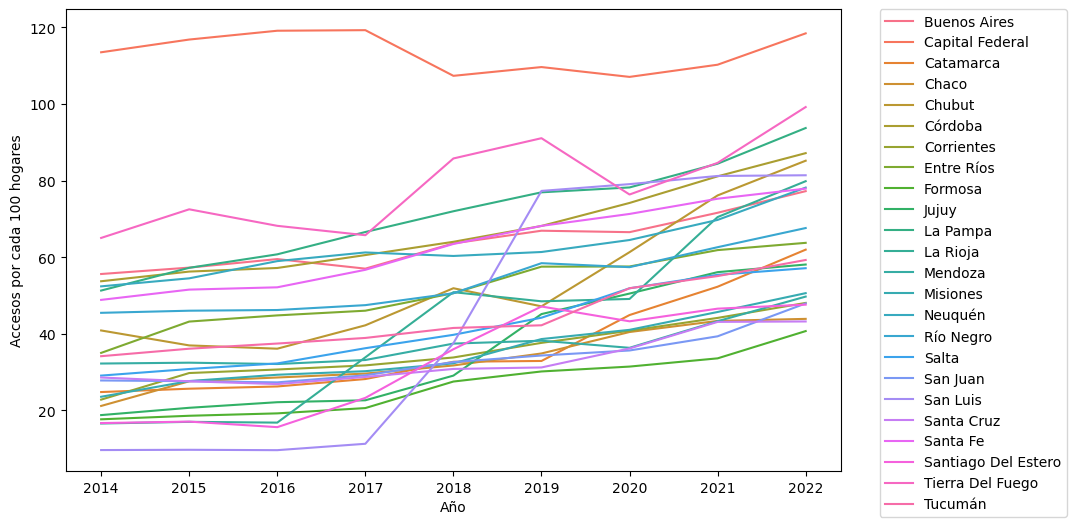

In [9]:
# gráfico de línea para ver cómo ha cambiado la penetración de Internet en el tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', data=df1, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
"""
Podemos ver provincias como San Luis y Formosa con un amplio nivel de penetración de acceso a internet a lo largo del tiempo, 
lo que sugiere un fuerte compromiso y apoyo de los gobiernos locales en la expansión de la conectividad en estas regiones. 
Por otro lado, notamos una estabilidad notoria en Buenos Aires, la provincia con mayor población en el país y una de las más desarrolladas económicamente,
lo que podría deberse a que ya se ha alcanzado un alto grado de penetración de acceso a internet en la región.
"""

Seguimos con el Dataframe "df2"

In [11]:
# veamos las primeras filas de DF
df2.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [32]:
# Los valores en "-0" nos pueden ser molestos a la hora de exportar nuestro DataFrame a Power Bi entonces los convertimos a cero
df2.fillna(0, inplace=True)

In [33]:
# observamos los cambios realizados
df2.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,0,2,0,975,0,664,7.218,0.0
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1.282,0.0
8,BUENOS AIRES,9 de Julio,9 de Julio,6588100,4.360,3.362,82,5.886,83,1,0,831,14.605,0.0
11,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),6588060,199,0,0,2,2,0,0,0,203,0.0
12,BUENOS AIRES,9 de Julio,Villa General Fournier (Est. 9 de Julio Sud),6588120,0,0,0,88,0,0,0,42,130,0.0


In [34]:
# Obtener información sobre el DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      1399 non-null   object 
 1   Partido        1399 non-null   object 
 2   Localidad      1399 non-null   object 
 3   Link Indec     1399 non-null   object 
 4   ADSL           1399 non-null   object 
 5   CABLEMODEM     1399 non-null   object 
 6   DIAL UP        1399 non-null   object 
 7   FIBRA OPTICA   1399 non-null   object 
 8   OTROS          1399 non-null   object 
 9   SATELITAL      1399 non-null   object 
 10  WIMAX          1399 non-null   object 
 11  WIRELESS       1399 non-null   object 
 12  Total general  1399 non-null   object 
 13  Unnamed: 13    1399 non-null   float64
dtypes: float64(1), object(13)
memory usage: 163.9+ KB


In [35]:
# Contar el número de valores nulos en cada columna
df2.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
Unnamed: 13      0
dtype: int64

In [36]:
# Contar el número de valores únicos en cada columna
df2.nunique()

Provincia          24
Partido           352
Localidad        1328
Link Indec       1153
ADSL              571
CABLEMODEM        546
DIAL UP            85
FIBRA OPTICA      705
OTROS             180
SATELITAL          21
WIMAX              10
WIRELESS          479
Total general    1038
Unnamed: 13         1
dtype: int64

In [75]:
#Exportamos en nuevo df para visualizarlo en Powerbi
df2.to_csv("Internet_tecnologia_localidad_Pbi.csv", index=False)

Comenzamos con la visualización de graficos para la detección de patrones y valores atípicos

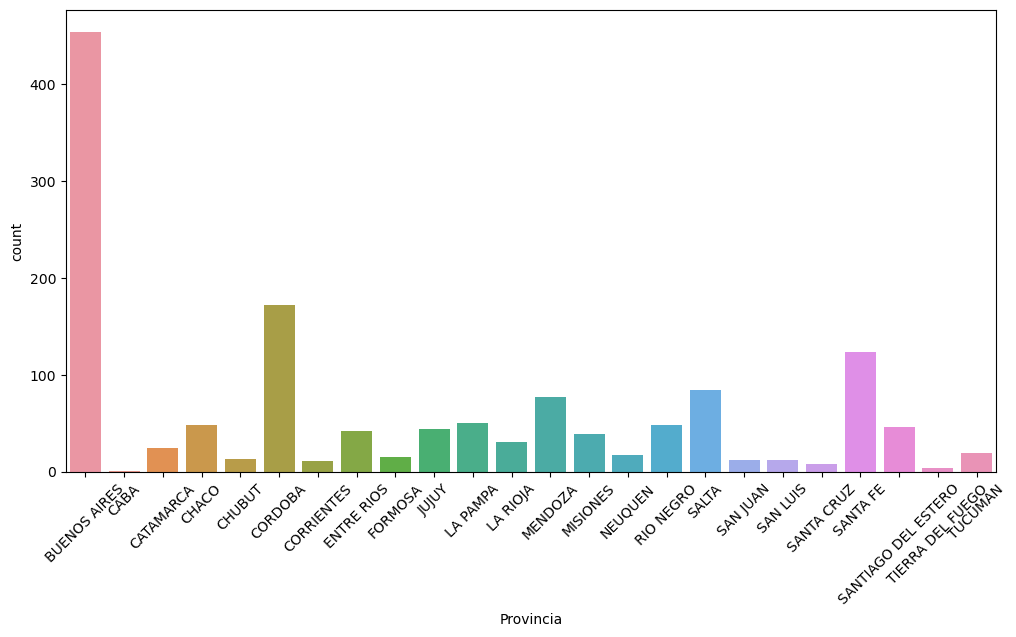

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='Provincia', data=df2)
plt.xticks(rotation=45)
plt.show()

In [ ]:
"""""
 A partir de esta información, se puede concluir que hay una mayor cantidad de datos recolectados en las provincias más pobladas y con mayor actividad 
 económica, como Buenos Aires, Córdoba y Santa Fe. Además, puede ser que en las provincias menos pobladas y económicamente menos activas se utilicen 
 menos servicios de internet y tecnología en general. Es importante tener en cuenta que los datos pueden estar sesgados debido a la forma 
 en que se recolectaron y a las fuentes de datos disponibles.
"""""

Text(0.5, 1.0, 'Distribución de conexiones de fibra óptica por localidad')

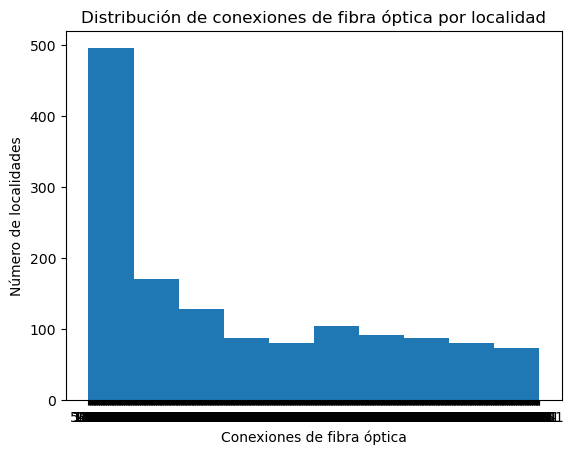

In [39]:
# Filtrar DataFrame para crear un Histograma
fibra_optica = df2["FIBRA OPTICA"]
# Crear histograma
plt.hist(fibra_optica)
# Agregar etiquetas y título
plt.xlabel("Conexiones de fibra óptica")
plt.ylabel("Número de localidades")
plt.title("Distribución de conexiones de fibra óptica por localidad")

In [ ]:
"""""
Podemos Concluir de este histograma es que la mayoría de las localidades tienen pocas conexiones de fibra óptica, y que hay muy pocas localidades 
con muchas conexiones. Además, podemos utilizar este histograma para identificar qué localidades necesitan mejorar su infraestructura de fibra óptica.
"""""

Seguimos con el Dataframe "df3"


In [42]:
# veamos las primeras filas de DF
df3.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Obtener información sobre el DataFrame
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [44]:
# Contar el número de valores nulos en cada columna
df3.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2142
              ... 
85 mbps       3097
90 mbps       3096
92 mbps       3096
95 mbps       3097
100 mbps      2545
Length: 83, dtype: int64

Comenzamos con la visualización de graficos para la detección de patrones y valores atípicos

In [46]:
# Verificar si hay celdas no numéricas en la columna '100 mbps'
non_numeric_values = df3[~df3['100 mbps'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_values)

         Provincia          Partido  \
11    BUENOS AIRES       9 de Julio   
17    BUENOS AIRES    Adolfo Alsina   
26    BUENOS AIRES          Alberti   
28    BUENOS AIRES  Almirante Brown   
29    BUENOS AIRES  Almirante Brown   
...            ...              ...   
3066       TUCUMAN            Lules   
3091       TUCUMAN       Tafí Viejo   
3092       TUCUMAN       Tafí Viejo   
3093       TUCUMAN       Tafí Viejo   
3097       TUCUMAN      Yerba Buena   

                                              Localidad Link Indec Otros  \
11                                           9 de Julio    6588100     1   
17                                               Carhué    6007010   NaN   
26                   Alberti   (Est. Andrés Vaccarezza)    6021010   NaN   
28                                              Adrogué    6028010   NaN   
29                                              Burzaco    6028010    50   
...                                                 ...        ...   ...   

In [47]:
# Eliminar filas que contengan celdas no numéricas en la columna '100 mbps'
df3 = df3[df3['100 mbps'].apply(lambda x: isinstance(x, (int, float)))]


In [51]:
# Los valores en "nulos" nos pueden ser molestos a la hora de exportar nuestro DataFrame a Power Bi entonces los convertimos a cero
df3.fillna(0, inplace=True)

In [54]:
# observamos los cambios realizados
df3.head()


,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0.0,0.0,2,0.0,0.0,...,0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0.0,0.0,1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
#Exportamos en nuevo df para visualizarlo en Powerbi
df3.to_csv("Internet_velocidad_bajada_pbi.csv", index=False)

Histograma para observar la distribución de la velocidad '0,256 mbps'

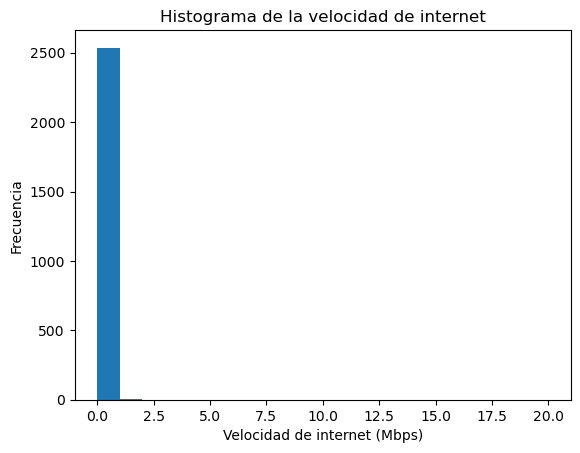

In [57]:
# Histograma de la velocidad de internet
plt.hist(df3['0,256 mbps'], bins=20)
plt.xlabel('Velocidad de internet (Mbps)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la velocidad de internet')
plt.show()

Gráfico de barras apilado para visualizar la distribución de los valores de varias columnas al mismo tiempo.

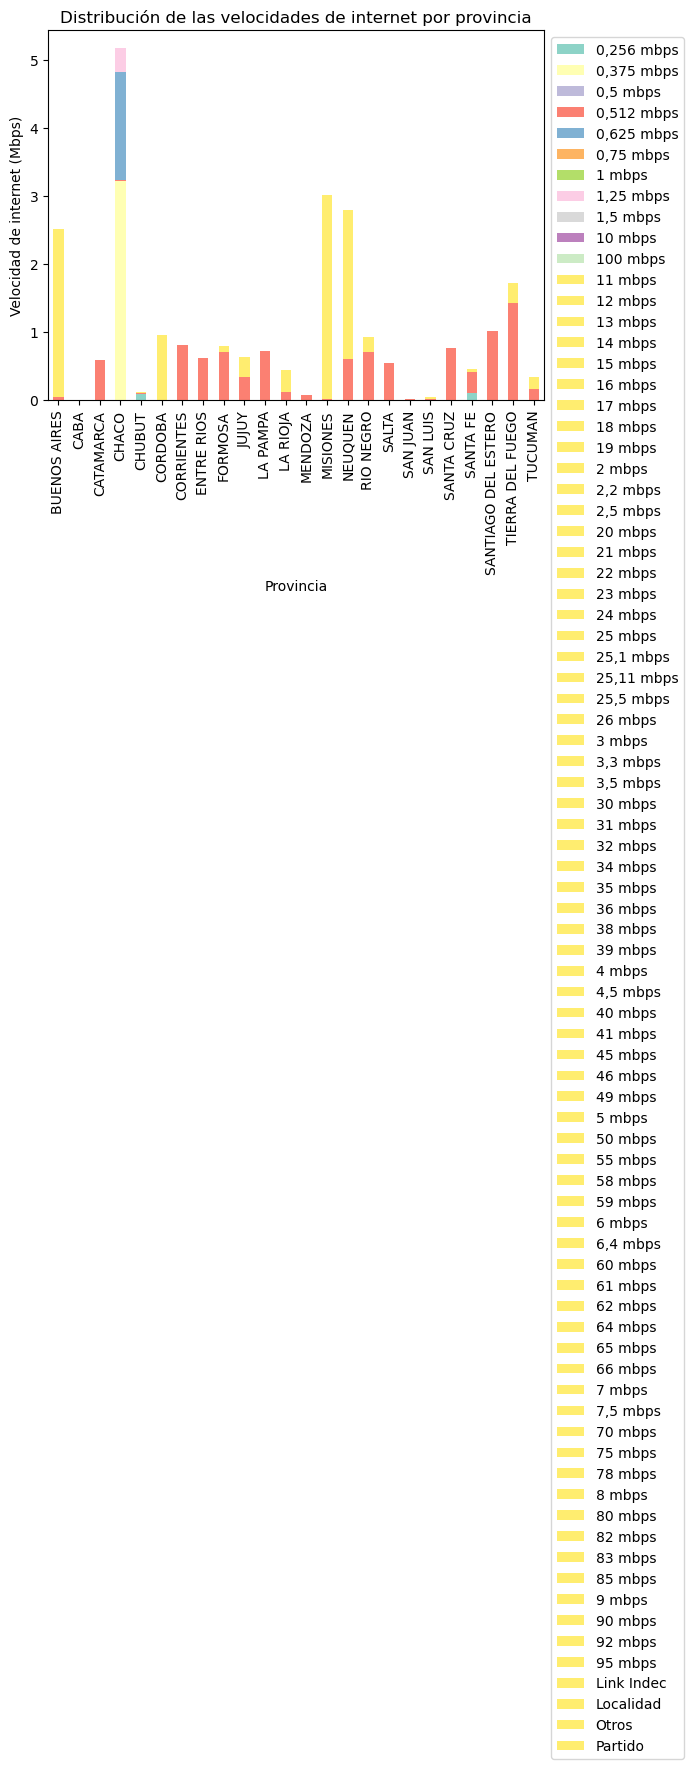

In [59]:
# Seleccionar las columnas de velocidad de internet y la columna de provincia
velocidades_por_provincia = df3.loc[:, 'Provincia':'100 mbps']
velocidades_por_provincia = velocidades_por_provincia.set_index('Provincia')

# Sumar las velocidades de internet por provincia y normalizar por el número de mediciones
velocidades_por_provincia_suma = velocidades_por_provincia.groupby('Provincia').sum()
num_mediciones_por_provincia = velocidades_por_provincia.groupby('Provincia').count()
velocidades_por_provincia_norm = velocidades_por_provincia_suma.div(num_mediciones_por_provincia, axis=0)

# Crear el gráfico de barras apilado
colores = plt.get_cmap('Set3')(np.arange(velocidades_por_provincia_norm.shape[1]))
velocidades_por_provincia_norm.plot(kind='bar', stacked=True, color=colores)
plt.xlabel('Provincia')
plt.ylabel('Velocidad de internet (Mbps)')
plt.title('Distribución de las velocidades de internet por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
"""""
Este gráfico de barras apilado muestra la distribución de las velocidades de internet para cada provincia, 
donde cada barra representa la velocidad de internet promedio para cada provincia y los segmentos de cada barra representan la distribución 
de las velocidades de internet en diferentes rangos de velocidad.

Basándonos en el gráfico de barras, podemos concluir que la velocidad de internet de bajada en Argentina 
presenta una distribución desigual a lo largo de las distintas provincias. Se puede observar una gran variabilidad en las velocidades de internet, 
desde los valores más bajos de 0.256 mbps hasta los valores más altos de 100 mbps. 
Algunas provincias como Chaco, Buenos Aires, Misiones y Neuquén presentan una mayor dispersión en las velocidades de internet, 
mientras que CABA, San Juan y San Luis presentan una distribución más homogénea. 
Es importante tener en cuenta que los datos analizados corresponden a una muestra y no representan necesariamente la totalidad 
de la población de Argentina. Por lo tanto, es recomendable continuar explorando los datos y realizar análisis estadísticos más detallados 
para obtener una comprensión más profunda de la distribución de la velocidad de internet de bajada en Argentina.
"""""

Seguimos con el Dataframe "df4"

In [61]:
# veamos las primeras filas de DF
df4.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [64]:
# Eliminamos las columnas que no nos sirven
df4 = df4.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1)

In [65]:
# Obtener información sobre el DataFrame
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [66]:
# Contar el número de valores nulos en cada columna
df4.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [69]:
#Creamos una nueva columna concatenando las columnas "Año" y "Trimestre" 
df4['año_trimestre'] = df4['Año'].astype(str) + '-T' + df4['Trimestre'].astype(str)


In [77]:
#Exportamos en nuevo df para visualizarlo en Powerbi
df4.to_csv("historico_velocidad_internet_Pbi.csv", index=False)

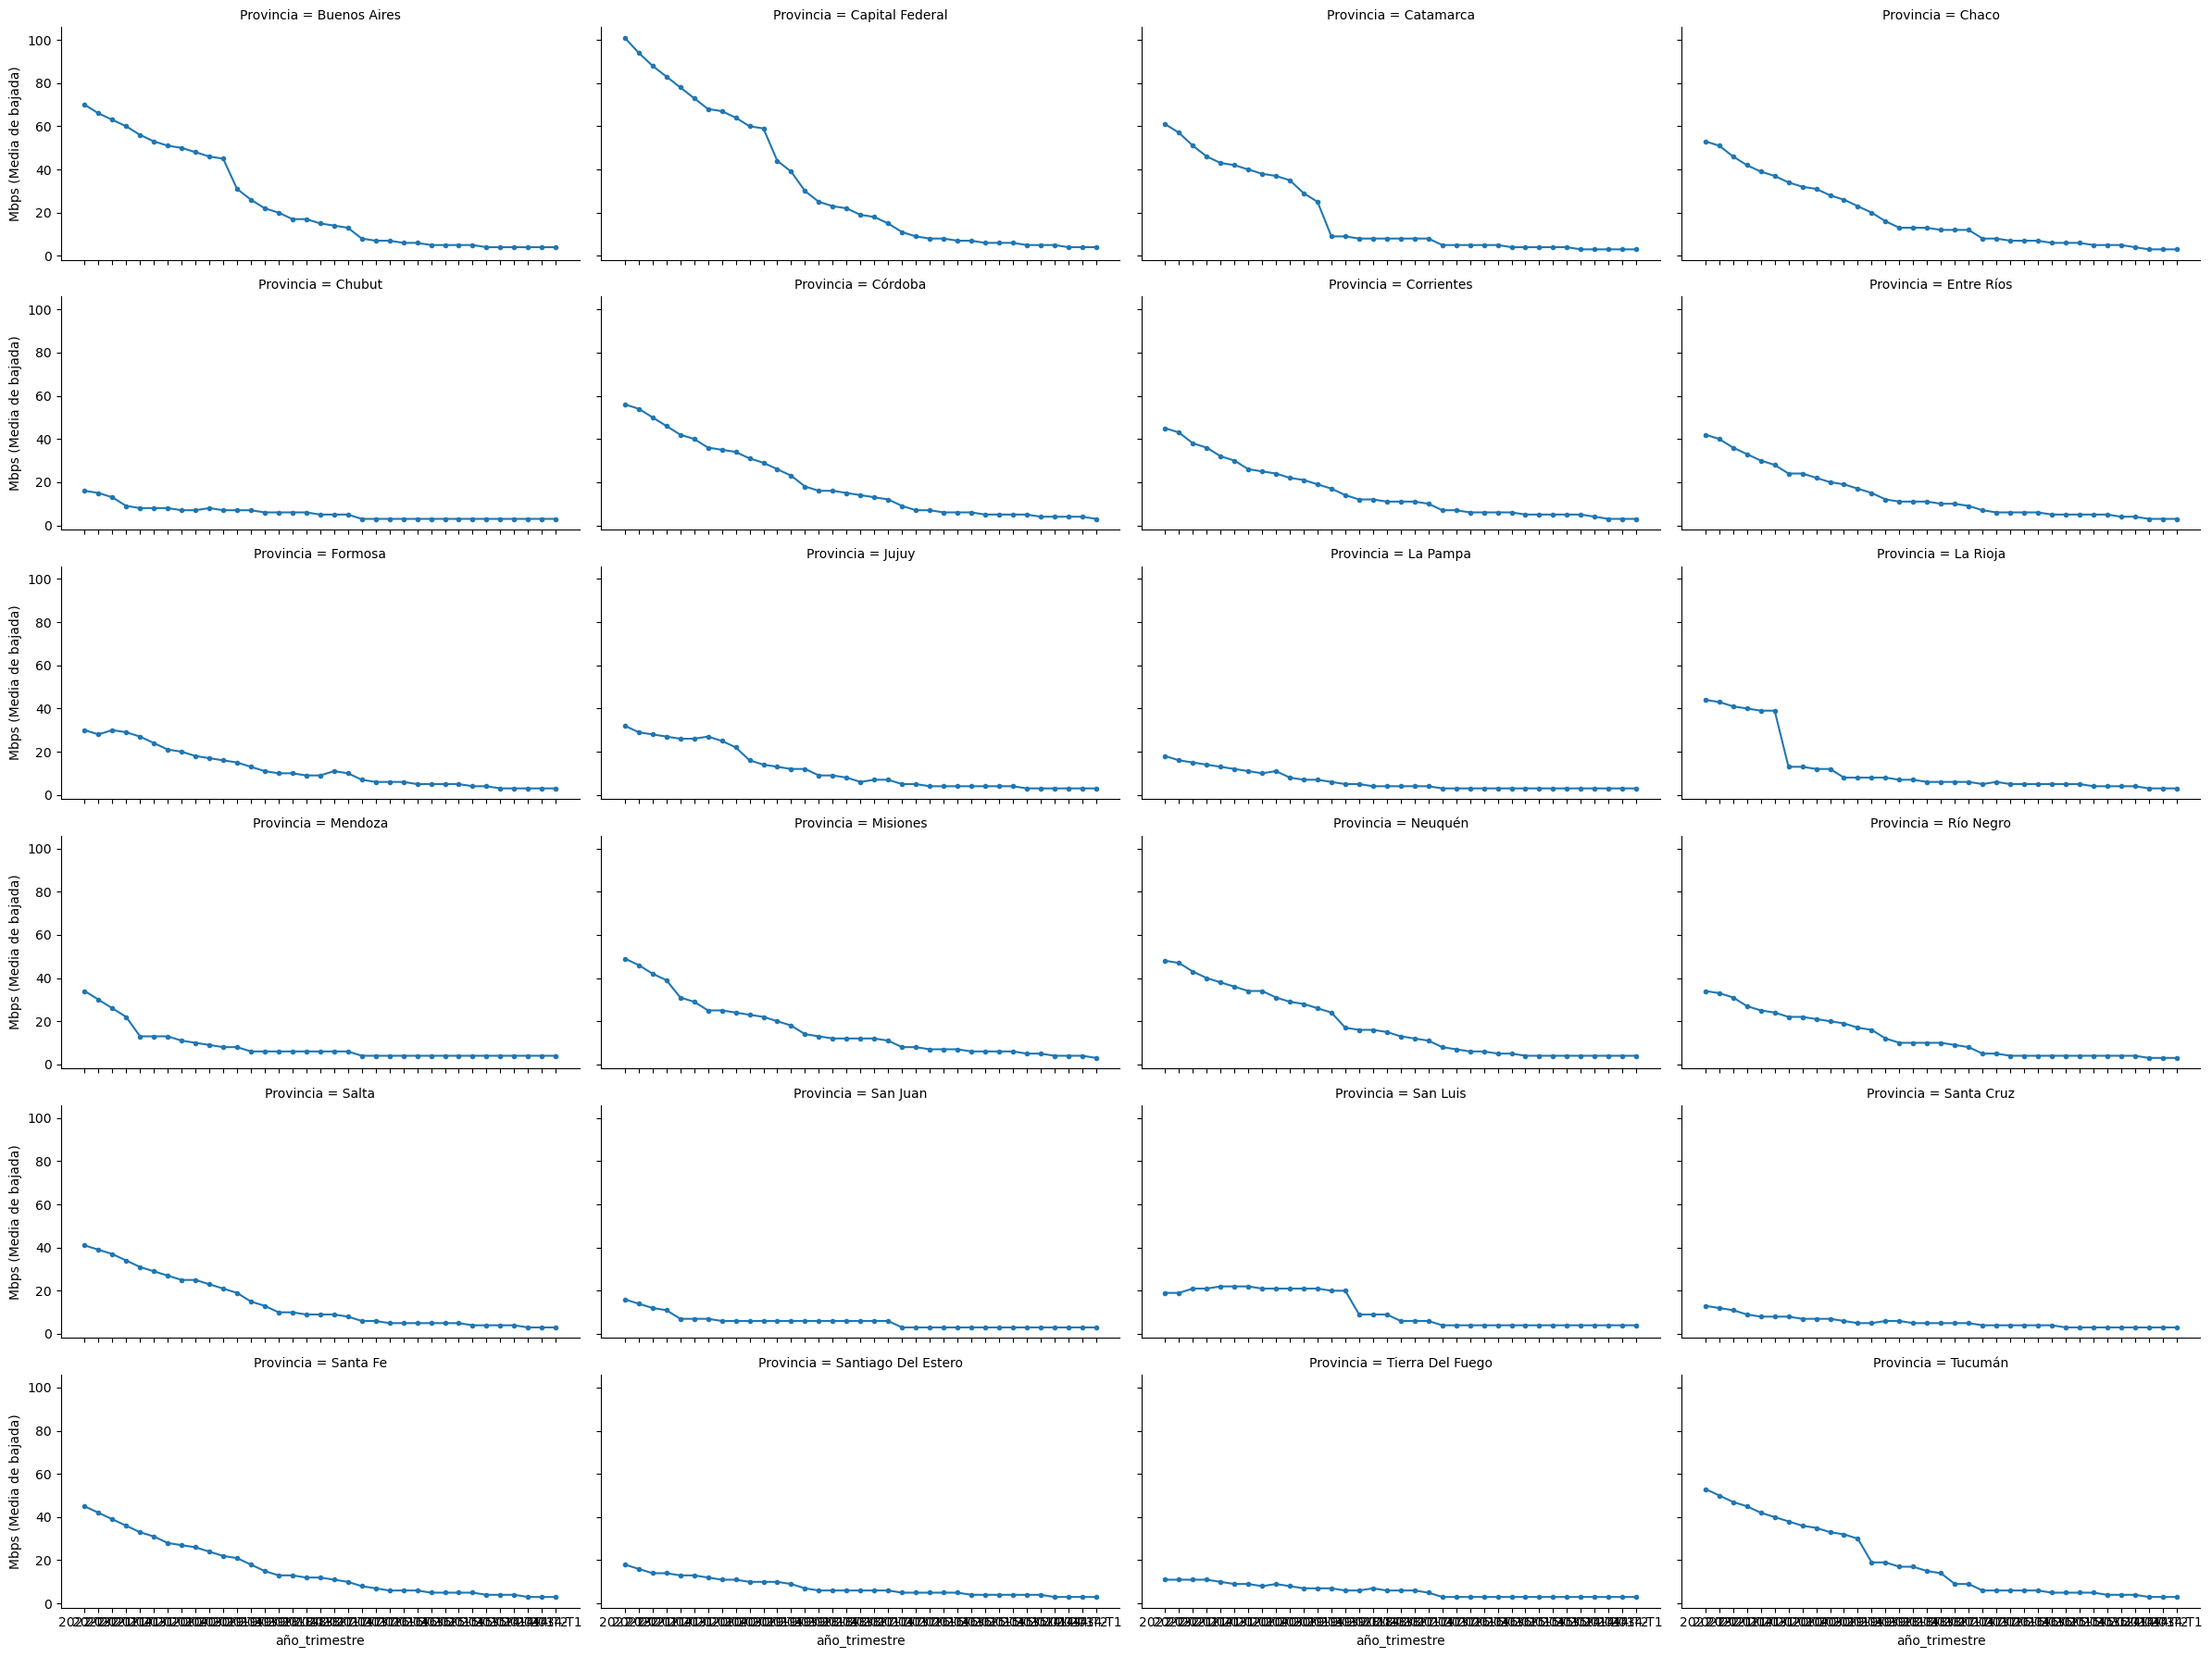

In [73]:
# Gráfico de líneas por provincia
g = sns.FacetGrid(df4, col='Provincia', col_wrap=4, height=3, aspect=2)
g.map(plt.plot, 'año_trimestre', 'Mbps (Media de bajada)', marker='.')

In [ ]:
"""""
Podemos observar cómo la velocidad media de bajada varía a lo largo de los años y trimestres. 
También podemos observar si hay alguna tendencia en la velocidad de bajada en cada provincia.
"""""

<AxesSubplot:>

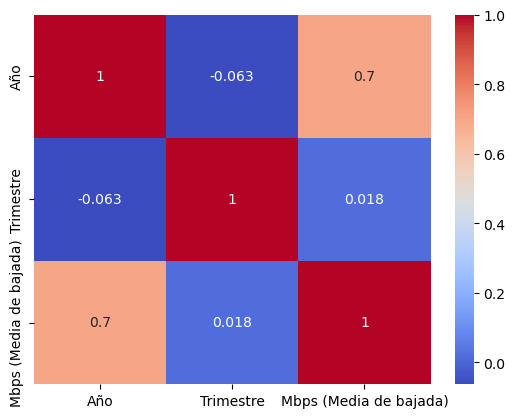

In [74]:
# Heatmap de correlación
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')

In [ ]:
""""
Este código generará un heatmap que muestra la correlación entre las variables numéricas en el conjunto de datos. Con esto, podemos observar 
si hay alguna correlación entre la velocidad de bajada y las otras variables en el conjunto de datos.
""""